In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk


Defaulting to user installation because normal site-packages is not writeable


In [17]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
import pandas as pd
import random

# Names and email domains
names = [
    "Aarav Sharma","Ananya Gupta","Rohan Verma","Priya Singh","Kunal Mehta",
    "Sneha Patel","Rahul Khanna","Neha Joshi","Vikram Malhotra","Pooja Iyer",
    "Aditya Rao","Ishita Kapoor","Saurabh Jain","Kriti Bansal","Nikhil Arora",
    "Simran Kaur","Arjun Nair","Meera Das","Amit Choudhary","Riya Saxena",
    "Mohit Aggarwal","Divya Malhotra","Akash Mishra","Payal Verma","Harshit Goel"
]

domains = ["gmail.com", "yahoo.com", "outlook.com", "hotmail.com", "company.com"]

# Ticket texts
network_issues = [
    "Internet is not working",
    "Network speed is very slow",
    "WiFi not connecting",
    "Network connection drops frequently",
    "Poor network coverage"
]

account_issues = [
    "Unable to login to my account",
    "Need password reset",
    "Account locked suddenly",
    "Forgot my account password",
    "Login credentials not accepted"
]

payment_issues = [
    "Payment failed but money deducted",
    "Refund not received",
    "Error while making online payment",
    "Transaction failed during payment",
    "Payment page not loading"
]

technical_issues = [
    "App crashes on opening",
    "Application freezes again and again",
    "Technical error in application",
    "Software not responding",
    "Unexpected error occurred"
]

# Dataset container
data = {
    "name": [],
    "email": [],
    "ticket_text": [],
    "category": []
}

# Generate 200 tickets
for i in range(200):
    name = random.choice(names)
    email = name.lower().replace(" ", ".") + "@" + random.choice(domains)

    category = random.choice([
        "Network Issue",
        "Account Issue",
        "Payment Issue",
        "Technical Issue"
    ])

    if category == "Network Issue":
        text = random.choice(network_issues)
    elif category == "Account Issue":
        text = random.choice(account_issues)
    elif category == "Payment Issue":
        text = random.choice(payment_issues)
    else:
        text = random.choice(technical_issues)

    data["name"].append(name)
    data["email"].append(email)
    data["ticket_text"].append(text)
    data["category"].append(category)

# Create DataFrame
df = pd.DataFrame(data)

# SAVE AS CSV (AUTOMATIC)
df.to_csv("support_tickets_200.csv", index=False)

df.head()


,name,email,ticket_text,category
0,Nikhil Arora,nikhil.arora@gmail.com,Forgot my account password,Account Issue
1,Aarav Sharma,aarav.sharma@company.com,Error while making online payment,Payment Issue
2,Vikram Malhotra,vikram.malhotra@gmail.com,WiFi not connecting,Network Issue
3,Saurabh Jain,saurabh.jain@hotmail.com,Application freezes again and again,Technical Issue
4,Saurabh Jain,saurabh.jain@yahoo.com,Software not responding,Technical Issue


In [40]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df["clean_text"] = df["ticket_text"].apply(clean_text)
df


,name,email,ticket_text,category,clean_text
0,Nikhil Arora,nikhil.arora@gmail.com,Forgot my account password,Account Issue,forgot account password
1,Aarav Sharma,aarav.sharma@company.com,Error while making online payment,Payment Issue,error making online payment
2,Vikram Malhotra,vikram.malhotra@gmail.com,WiFi not connecting,Network Issue,wifi connecting
3,Saurabh Jain,saurabh.jain@hotmail.com,Application freezes again and again,Technical Issue,application freeze
4,Saurabh Jain,saurabh.jain@yahoo.com,Software not responding,Technical Issue,software responding
...,...,...,...,...,...
195,Arjun Nair,arjun.nair@yahoo.com,Payment page not loading,Payment Issue,payment page loading
196,Aarav Sharma,aarav.sharma@yahoo.com,Network connection drops frequently,Network Issue,network connection drop frequently
197,Aditya Rao,aditya.rao@yahoo.com,Refund not received,Payment Issue,refund received
198,Arjun Nair,arjun.nair@hotmail.com,Unable to login to my account,Account Issue,unable login account


In [41]:
X = df["clean_text"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [42]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [44]:
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:

                 precision    recall  f1-score   support

  Account Issue       1.00      1.00      1.00        10
  Network Issue       1.00      1.00      1.00        11
  Payment Issue       1.00      1.00      1.00        13
Technical Issue       1.00      1.00      1.00         6

       accuracy                           1.00        40
      macro avg       1.00      1.00      1.00        40
   weighted avg       1.00      1.00      1.00        40



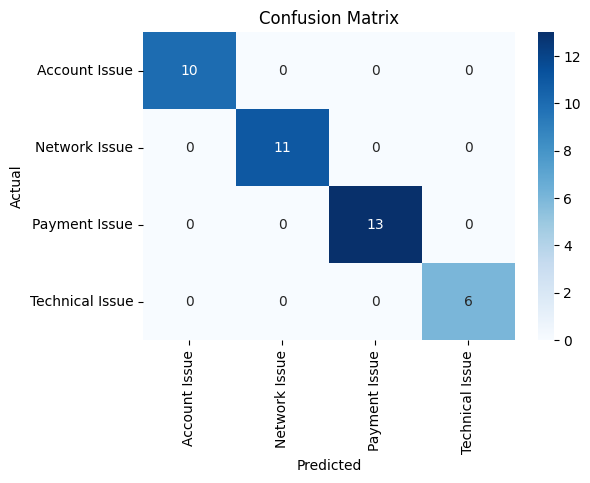

In [45]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=model.classes_,
            yticklabels=model.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [46]:
new_ticket = ["Refund still not received"]
new_ticket_clean = [clean_text(new_ticket[0])]
new_ticket_tfidf = tfidf.transform(new_ticket_clean)

prediction = model.predict(new_ticket_tfidf)
print("Predicted Category:", prediction[0])


Predicted Category: Payment Issue
